In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
model=RandomForestClassifier(n_estimators=1000)

In [4]:
data=pd.read_csv('/content/seattle-weather.csv')

In [5]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
data_val=data['weather'].unique()

In [7]:
print(data_val)

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [8]:
col=list(data_val)

In [9]:
col

['drizzle', 'rain', 'sun', 'snow', 'fog']

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
c=LabelEncoder()

In [12]:
data['weather']=c.fit_transform(data['weather'])

In [13]:
cc=data['weather'].value_counts()

In [14]:
cc

,count
weather,
2,641
4,640
1,101
0,53
3,26


<Axes: xlabel='weather', ylabel='count'>

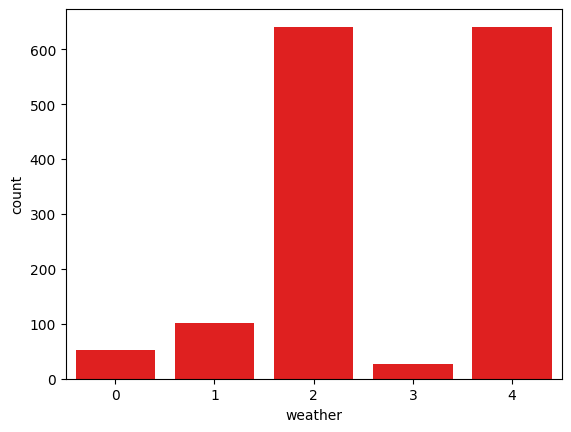

In [24]:
sns.barplot(cc,color='red')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.6+ KB


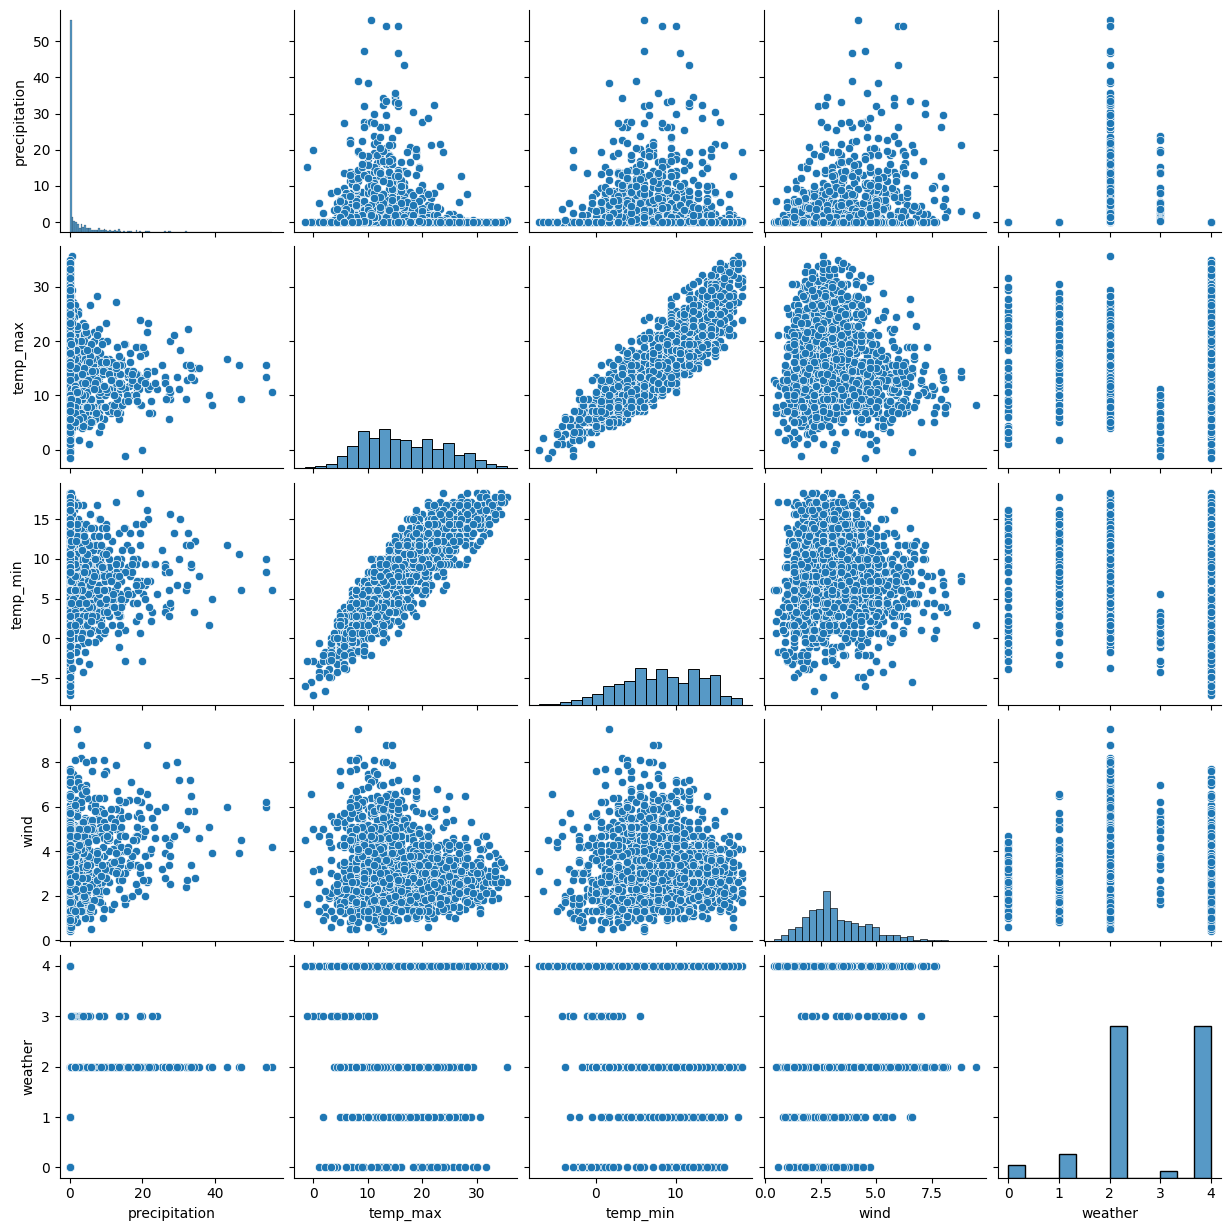

In [ ]:
sns.pairplot(data)

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
x=data.drop(columns=['date','weather'])
y=data['weather']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1022, 4) (439, 4) (1022,) (439,)


In [34]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [35]:
y_pred=model.predict(x_test)

In [36]:
classification=classification_report(y_pred,y_test)

In [37]:
print(classification)

              precision    recall  f1-score   support

           0       0.05      0.25      0.09         4
           1       0.11      0.27      0.16        15
           2       0.90      0.98      0.94       174
           3       0.50      0.50      0.50         4
           4       0.95      0.75      0.84       242

    accuracy                           0.82       439
   macro avg       0.50      0.55      0.51       439
weighted avg       0.89      0.82      0.85       439



In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Dense

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1022, 4) (439, 4) (1022,) (439,)


In [61]:
models=Sequential([
    Dense(15,activation='relu',input_shape=(4,)),
    Dense(12,activation='relu'),
    Dense(5,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
models.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
history=models.fit(x_train,y_train,epochs=10,validation_split=0.3,batch_size=32)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8670 - loss: 0.4110 - val_accuracy: 0.8502 - val_loss: 0.4935
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8573 - loss: 0.4285 - val_accuracy: 0.8599 - val_loss: 0.4723
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8893 - loss: 0.3746 - val_accuracy: 0.8632 - val_loss: 0.4804
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8538 - loss: 0.4449 - val_accuracy: 0.8632 - val_loss: 0.4805
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8587 - loss: 0.4212 - val_accuracy: 0.8534 - val_loss: 0.4798
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8624 - loss: 0.4113 - val_accuracy: 0.8502 - val_loss: 0.4873
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8612 - loss: 0.4144 - val_accuracy: 0.8664 - val_loss: 0.4842
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8668 - loss: 0.4128 - val_accuracy: 0.8599 - val_loss

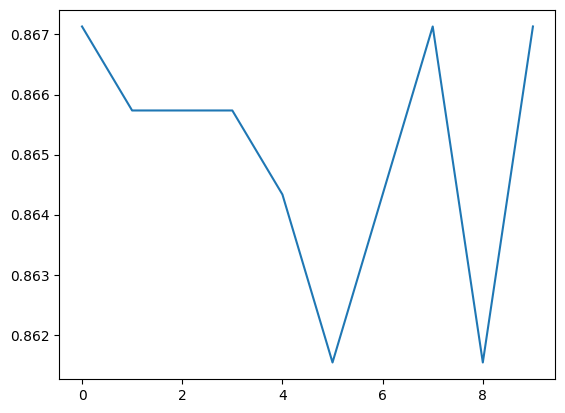

In [71]:
plt.plot(history.history['accuracy'],)

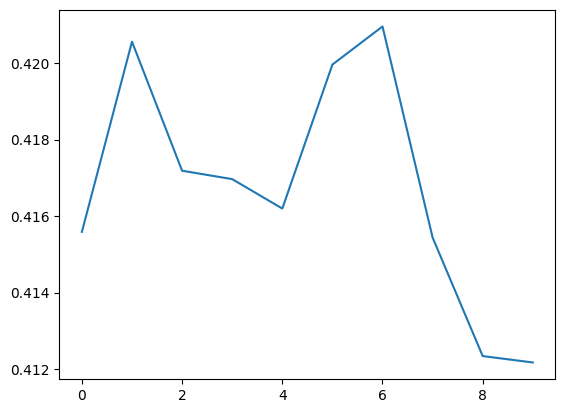

In [72]:
plt.plot(history.history['loss'])

In [73]:
y_pred=models.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [78]:
loss,acc=models.evaluate(x_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.5200 
